### Purpose of the script

In `hydrate_tweets_2020-12-17.ipynb`, we sourced tweets from https://ieee-dataport.org/open-access/coronavirus-covid-19-geo-tagged-tweets-dataset in order to get tweets with location information.

We used tweets from the following dates:

1. April 17th: DeSantis issues a statewide stay-at-home order following growing pressure to do so
2. May 18th: DeSantis says that Florida will begin full phase one of reopening, allowing gyms and restaurants to operate at 50% capacity, starting May 18.
3. June 5th: DeSantis announces that Florida could move into Phase 2 except south Florida, specifically Miami-Dade, Broward, and Palm Beach, which need to submit plans for reopening. Phase 2 in Florida begins, with bars allowed to open at 50% capacity with social distancing and sanitation.
4. July 2nd: Florida reports 10,000 new coronavirus cases in a single day, the biggest one-day increase in the state since the pandemic started, and more than any European country had at the height of their outbreaks.
5. September 25th: Governor Ron DeSantis fully opened the state of Florida by executive order on Friday. The order also prohibits local governments from imposing fines or shutting down businesses, or enforcing mask mandates
6. October 17th: Florida reported its highest COVID19 numbers in two onths. The seven-day average was more than 3,300 cases. Reporting anomalies made it more difficult to gather statistical trends. Positivity rate was 5.2%, with over 2,000 hospitalizations. 
7. December 17th:  Florida reported 13,148 new cases, largest since July 16th

All these dates correspond with important COVID-related events in Florida. I chose Florida since it's had a large range of different COVID-related events (e.g., openings, closings, shutdowns, etc.), rather than some other states that, say, had an initial lockdown and stayed in lockdown. 

We'll now analyze those tweets. 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import wordcloud
from wordcloud import WordCloud

In [3]:
IMPORT_DIR = "../../data/tweets/"

In [4]:
os.listdir(IMPORT_DIR)

['.tweet_scrape_2020-11-30_control.json.icloud',
 '.DS_Store',
 '.tweet_scrape_2020_11_25.json.icloud',
 'tweet_ids',
 '.tweet_scrape_2020-11-30_treatment.csv.icloud',
 '.tweet_scrape_2020-11-30_treatment.json.icloud',
 '.tweet_scrape_2020-11-30_control.csv.icloud',
 'tweets_2020-12-18_with_locations.csv',
 '.tweet_scrape_2020_11_25.csv.icloud',
 'hydrated_tweets']

In [82]:
tweets = pd.read_csv(IMPORT_DIR + "tweets_2020-12-18_with_locations.csv")

In [11]:
tweets.head()

,Unnamed: 0,id,full_text,retweet_count,favorite_count,place,US_state,date_of_tweet,month_of_tweet,day_of_tweet,hour_of_tweet,cleaned_text,hashtags,hashtags_count,cleaned_text_no_hashtags
0,0,1250641596887990272,Finally got to a color I love and a length I’m...,0,0.0,"{'id': '495a55057ac886b9', 'url': 'https://api...",VT,2020-04-16,4.0,16,4,"['finally', 'got', 'color', 'love', 'length', ...","['#quarantine', '#covid', '#corona', '#haircol...",11.0,"['finally', 'got', 'color', 'love', 'length', ..."
1,1,1250646705516707840,#wutang #wutangforever #corona @ Downtown Los ...,0,0.0,"{'id': '3b77caf94bfc81fe', 'url': 'https://api...",CA,2020-04-16,4.0,16,4,"['#wutang', '#wutangforever', '#corona', 'down...","['#wutang', '#wutangforever', '#corona']",3.0,"['downtown', 'los', 'angeles']"
2,2,1250647034253709315,"Swirling again @ Corona, California https://t....",0,0.0,"{'id': '5e4b6834e36e68fa', 'url': 'https://api...",CA,2020-04-16,4.0,16,4,"['swirling', 'corona', 'california']",[],0.0,"['swirling', 'corona', 'california']"
3,3,1250655078744240134,Does it feel like you want to #Crawl on the wa...,0,0.0,"{'id': 'd56c5babcffde8ef', 'url': 'https://api...",NaN,2020-04-16,4.0,16,5,"['feel', 'like', 'want', '#crawl', 'walls', 'g...","['#crawl', '#quarantine', '#staygolden', '#sta...",9.0,"['feel', 'like', 'want', 'walls', 'get', 'here..."
4,4,1250655491904147456,Get your stanky booty to Cave Creek &amp; Care...,0,1.0,"{'id': '005e9bd60c4f1337', 'url': 'https://api...",AZ,2020-04-16,4.0,16,5,"['get', 'stanky', 'booty', 'cave', 'creek', 'a...","['#walmart', '#cavecreek', '#toiletpaper', '#q...",6.0,"['get', 'stanky', 'booty', 'cave', 'creek', 'a..."


In [55]:
tweets.shape

(11077, 15)

Remove rows with NaNs

In [83]:
tweets = tweets.dropna(axis=0, subset=["cleaned_text", "cleaned_text_no_hashtags"])

In [81]:
tweets.shape

(11075, 15)

We have to edit the columns with list (e.g., "hashtags") to represent them as lists (they're currently strings)

In [84]:
tweets["cleaned_text"] = tweets["cleaned_text"].apply(lambda x : ast.literal_eval(x))

In [85]:
tweets["hashtags"] = tweets["hashtags"].apply(lambda x : ast.literal_eval(x))

In [86]:
tweets["cleaned_text_no_hashtags"] = tweets["cleaned_text_no_hashtags"].apply(lambda x : ast.literal_eval(x))

### Preliminary analysis

How many tweets do we have per state?

In [9]:
tweets["US_state"].value_counts()

NY                886
CA                869
USA               492
TX                318
FL                310
GA                180
IL                129
DC                116
NJ                101
PA                 93
MA                 88
MD                 87
NC                 81
OH                 80
TN                 78
WA                 75
VA                 67
MI                 66
AZ                 64
OR                 63
IN                 59
CO                 51
LA                 49
NV                 46
AL                 40
CT                 35
HI                 33
MO                 32
MN                 30
SC                 29
UT                 19
WI                 19
MT                 17
RI                 15
OK                 15
KY                 13
MS                 13
VT                 12
KS                 12
NM                 11
NE                 10
IA                  8
SD                  8
WV                  7
AR                  7
ME        

We don't have a lot of state-level information (or tweets, for that matter), but we have enough to work with as a first pass. 

### Analysis of hashtags

How many hashtags do the tweets have?

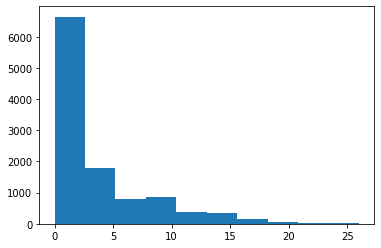

In [87]:
plt.hist(tweets["hashtags_count"])
plt.show()

In [88]:
tweets["hashtags_count"].describe()

count    11075.000000
mean         3.243160
std          4.429164
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max         26.000000
Name: hashtags_count, dtype: float64

What are the most common hashtags?

In [94]:
all_hashtags = []

In [95]:
for lst in tweets["hashtags"]:
    try:
        if len(lst) > 0:
            for elem in lst:
                all_hashtags.append(elem)
    except Exception as e:
        continue

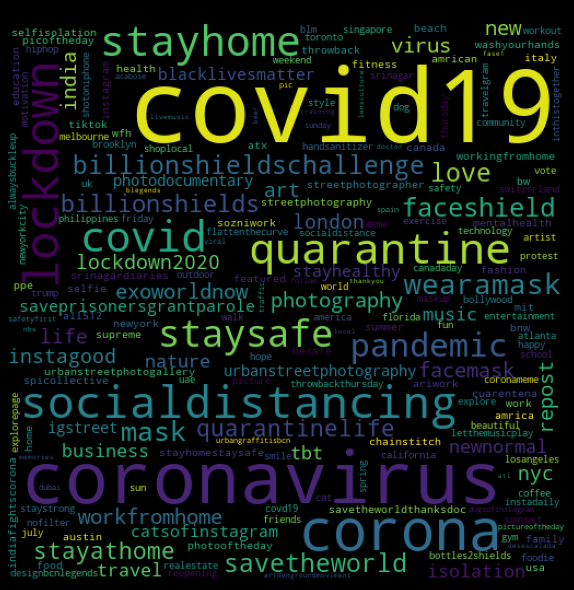

In [108]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(all_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

How does the distribution of hashtags vary across time?

We can look at tweets, by month, and see how the wordcloud changes

In [105]:
april_hashtags = []
may_hashtags = []
june_hashtags = []
july_hashtags = []
september_hashtags = []
october_hashtags = []

In [106]:
for month_num in [4, 5, 6, 7, 9, 10]:
    hashtag_subset = tweets[tweets["month_of_tweet"]==month_num]["hashtags"]
    hashtag_lst = []
    for lst in hashtag_subset:
        try:
            if len(lst) > 0:
                for elem in lst:
                    hashtag_lst.append(elem)
        except Exception as e:
            continue
            
    if month_num == 4:
        april_hashtags = hashtag_lst
    elif month_num == 5:
        may_hashtags = hashtag_lst
    elif month_num == 6:
        june_hashtags = hashtag_lst
    elif month_num == 7:
        july_hashtags = hashtag_lst
    elif month_num == 9:
        september_hashtags = hashtag_lst
    elif month_num == 10:
        october_hashtags = hashtag_lst

Now, let's do the hashtags per month:

#### April

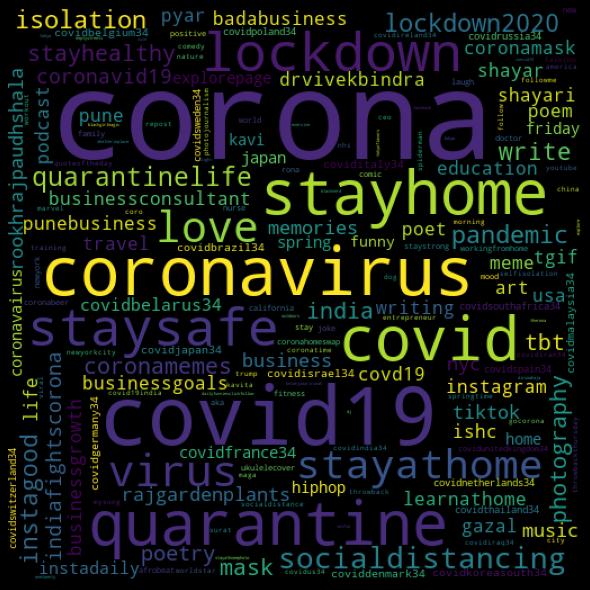

In [109]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(april_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### May

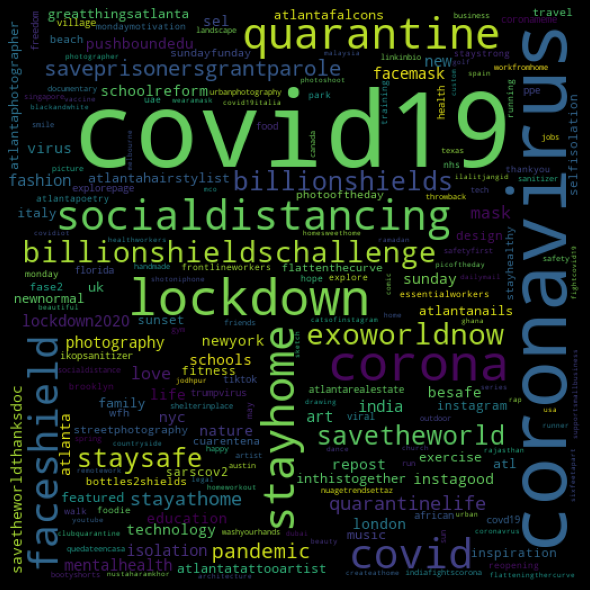

In [110]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(may_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### June

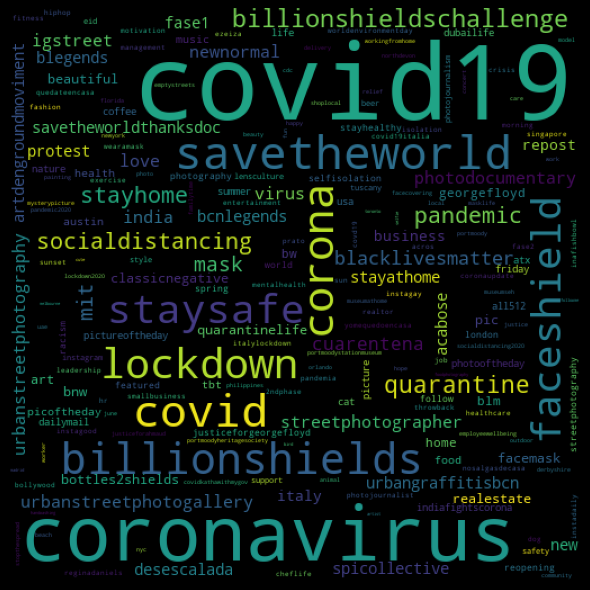

In [111]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(june_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### July

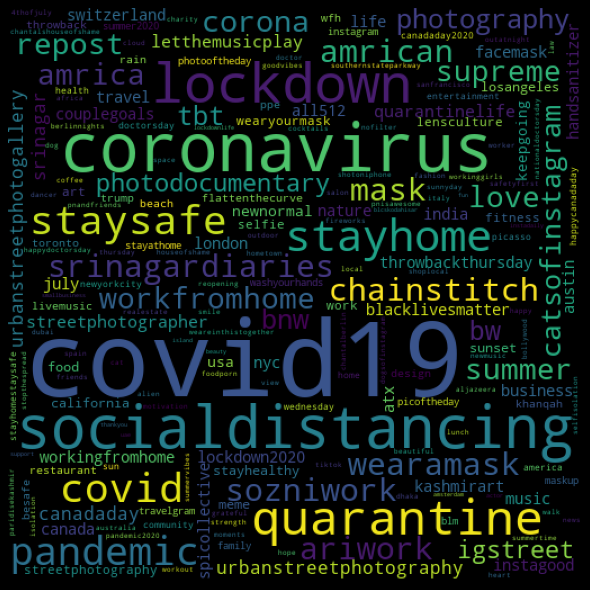

In [112]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(july_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### September

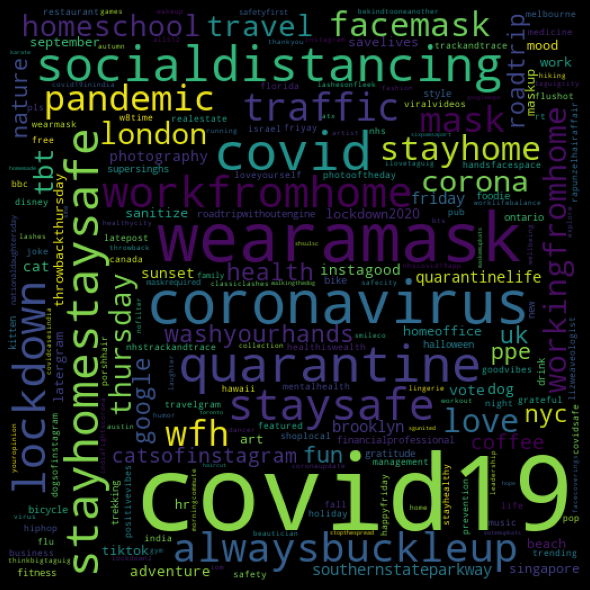

In [113]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(september_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### October

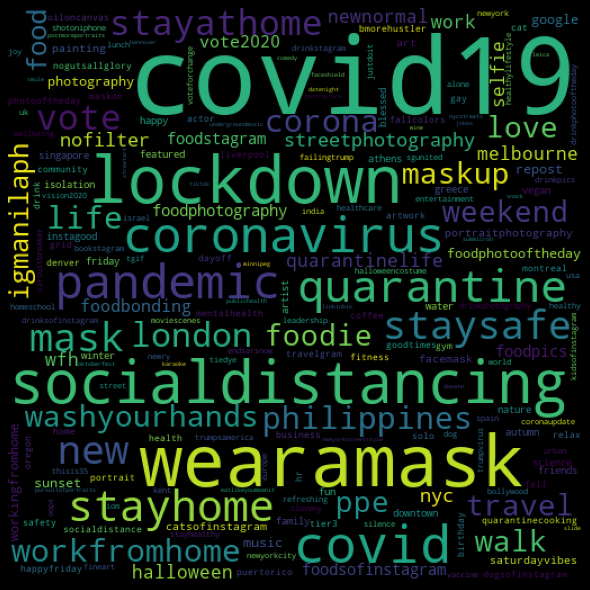

In [114]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(october_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Now, can we evaluate hashtags by location? We have 4 states that have a decent number of tweets ("NY", "CA", "TX", "FL"). Do the hashtags vary in these locations?

In [117]:
NY_hashtags = []
CA_hashtags = []
TX_hashtags = []
FL_hashtags = []


In [118]:
tweets.head()

,Unnamed: 0,id,full_text,retweet_count,favorite_count,place,US_state,date_of_tweet,month_of_tweet,day_of_tweet,hour_of_tweet,cleaned_text,hashtags,hashtags_count,cleaned_text_no_hashtags
0,0,1250641596887990272,Finally got to a color I love and a length I’m...,0,0.0,"{'id': '495a55057ac886b9', 'url': 'https://api...",VT,2020-04-16,4.0,16,4,"[finally, got, color, love, length, im, okay, ...","[#quarantine, #covid, #corona, #haircolor, #ha...",11.0,"[finally, got, color, love, length, im, okay, ..."
1,1,1250646705516707840,#wutang #wutangforever #corona @ Downtown Los ...,0,0.0,"{'id': '3b77caf94bfc81fe', 'url': 'https://api...",CA,2020-04-16,4.0,16,4,"[#wutang, #wutangforever, #corona, downtown, l...","[#wutang, #wutangforever, #corona]",3.0,"[downtown, los, angeles]"
2,2,1250647034253709315,"Swirling again @ Corona, California https://t....",0,0.0,"{'id': '5e4b6834e36e68fa', 'url': 'https://api...",CA,2020-04-16,4.0,16,4,"[swirling, corona, california]",[],0.0,"[swirling, corona, california]"
3,3,1250655078744240134,Does it feel like you want to #Crawl on the wa...,0,0.0,"{'id': 'd56c5babcffde8ef', 'url': 'https://api...",NaN,2020-04-16,4.0,16,5,"[feel, like, want, #crawl, walls, get, heres, ...","[#crawl, #quarantine, #staygolden, #staysafe, ...",9.0,"[feel, like, want, walls, get, heres, dont, dr..."
4,4,1250655491904147456,Get your stanky booty to Cave Creek &amp; Care...,0,1.0,"{'id': '005e9bd60c4f1337', 'url': 'https://api...",AZ,2020-04-16,4.0,16,5,"[get, stanky, booty, cave, creek, amp, carefre...","[#walmart, #cavecreek, #toiletpaper, #quaranti...",6.0,"[get, stanky, booty, cave, creek, amp, carefre..."


In [119]:
for state in ["NY", "CA", "TX", "FL"]:
    hashtag_subset = tweets[tweets["US_state"]==state]["hashtags"]
    hashtag_lst = []
    for lst in hashtag_subset:
        try:
            if len(lst) > 0:
                for elem in lst:
                    hashtag_lst.append(elem)
        except Exception as e:
            continue
            
    if state == "NY":
        NY_hashtags = hashtag_lst
    elif state == "CA":
        CA_hashtags = hashtag_lst
    elif state == "TX":
        TX_hashtags = hashtag_lst
    elif state == "FL":
        FL_hashtags = hashtag_lst

#### NY

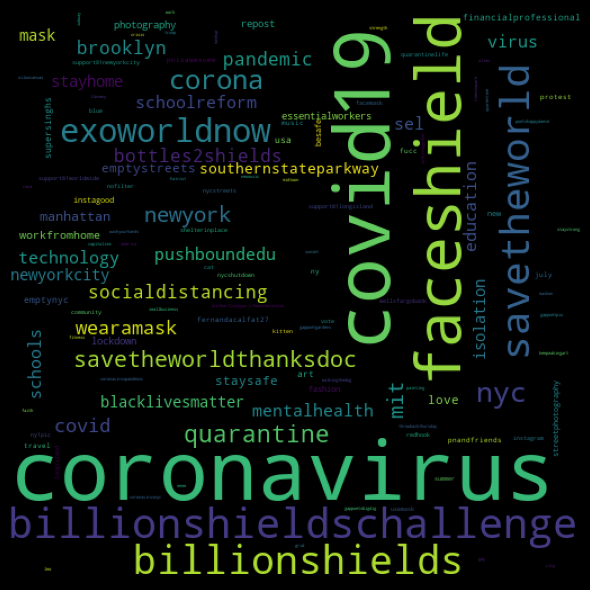

In [120]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(NY_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### CA

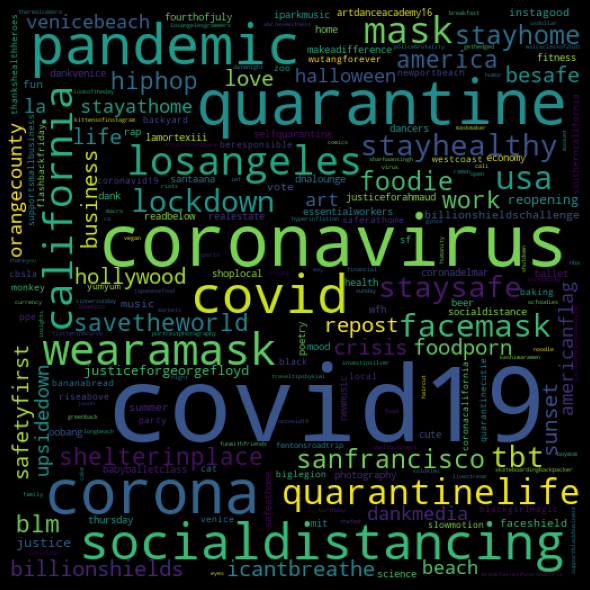

In [121]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(CA_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### TX

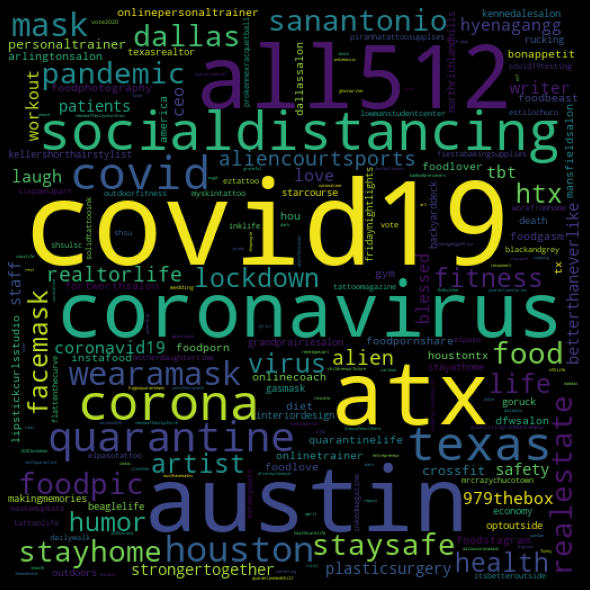

In [122]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(TX_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### FL

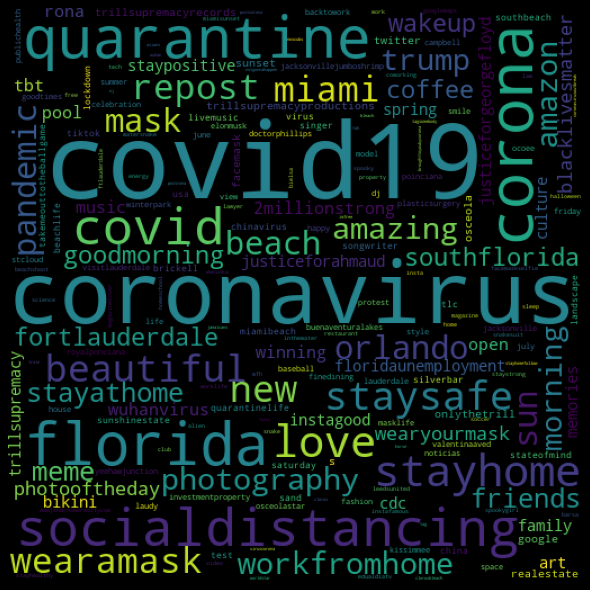

In [123]:
hashtags_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="viridis").generate(" ".join(FL_hashtags))
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(hashtags_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()